# De beaux graphiques avec python : mise en pratique

Lino Galiana  
2024-09-23

La pratique de la *data visualisation* se fera, dans ce cours, en r√©pliquant des graphiques qu‚Äôon peut trouver sur
la page de l‚Äô*open data* de la ville de Paris
[ici](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/dataviz/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name) ou en proposant des alternatives √† ceux-ci sur les m√™mes donn√©es.

L‚Äôobjectif de ce chapitre n‚Äôest pas de faire un inventaire complet des graphiques pouvant √™tre fait avec `Python`, ce serait long, assez insipide et peu pertinent car des sites le font d√©j√† tr√®s bien √† partir d‚Äôune grande vari√©t√© d‚Äôexemple, notamment le site [python-graph-gallery.com/](https://python-graph-gallery.com/). L‚Äôobjectif est plut√¥t d‚Äôillustrer, par la pratique, quelques enjeux li√©s √† l‚Äôutilisation des principales librairies graphiques de `Python`.

On peut distinguer quelques grandes familles de repr√©sentations graphiques: les repr√©sentations de distributions propres √† une variable, les repr√©sentations de relations entre plusieurs variables, les cartes qui permettent de repr√©senter dans l‚Äôespace une ou plusieurs variables‚Ä¶

Ces familles se ramifient elles-m√™mes en de multiples types de figures. Par exemple, selon la nature du ph√©nom√®ne, les repr√©sentations de relations peuvent prendre la forme d‚Äôune s√©rie temporelle (√©volution d‚Äôune variable dans le temps), d‚Äôun nuage de point (corr√©lation entre deux variables), d‚Äôun diagramme en barre (pour souligner le rapport relatif entre les valeurs d‚Äôune variable en fonction d‚Äôune autre), etc.

Plut√¥t qu‚Äôun inventaire √† la Pr√©vert des types de visualisations possibles, ce chapitre et le suivant vont plut√¥t proposer quelques visualisations qui pourraient donner envie d‚Äôaller plus loin dans l‚Äôanalyse avant la mise en oeuvre d‚Äôune forme de mod√©lisation. Ce chapitre est consacr√© aux visualisations traditionnelles, le [suivant](../../content/visualisation/maps.qmd) est d√©di√© √† la cartographie. Ces deux chapitres font partie d‚Äôun tout visant √† offrir les premiers √©l√©ments pour synth√©tiser l‚Äôinformation pr√©sente dans un jeu de donn√©es.

Le pas suivant est d‚Äôapprofondir le travail de communication et de synth√®se par le biais de communications pouvant prendre des formes aussi diverses que des rapports, des publications scientifiques ou articles, des pr√©sentations, une application interactive, un site web ou des *notebooks* comme ceux propos√©s par ce cours. Le principe g√©n√©ral est identique quelle que soit le *medium* utilis√© et int√©resse particuli√®rement les *data scientists* lorsqu‚Äôils font appel √† de l‚Äôexploitation intensive de donn√©es. Ce sera l‚Äôobjet d‚Äôun chapitre futur de ce cours[1].

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Important</h3>

√ätre capable de construire des visualisations de donn√©es
int√©ressantes est une comp√©tence n√©cessaire √† tout
*data scientist* ou chercheur. Pour am√©liorer
la qualit√© de ces visualisations, il est recommand√©
de suivre certains conseils donn√©s par des sp√©cialistes
de la *dataviz* sur la s√©miologie graphique.

Les bonnes visualisations de donn√©es, comme celles du *New York Times*,
reposent certes sur des outils adapt√©s (des librairies `JavaScript`)
mais aussi sur certaines r√®gles de repr√©sentation qui permettent
de comprendre en quelques secondes le message d‚Äôune visualisation.

Ce [post de blog](https://blog.datawrapper.de/text-in-data-visualizations/)
est une ressource qu‚Äôil est utile de consulter r√©guli√®rement.
Ce [post de blog d‚ÄôAlbert Rapp](https://albert-rapp.de/posts/ggplot2-tips/10_recreating_swd_look/10_recreating_swd_look) montre bien comment construire graduellement une bonne visualisation
de donn√©es.

</div>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Comp√©tences √† l‚Äôissue de ce chapitre</h3>

-   D√©couvrir l‚Äô√©cosyst√®me [`matplotlib`](https://matplotlib.org/) et
    [`seaborn`](https://seaborn.pydata.org/) pour la construction de graphiques par enrichissement successif de couches.
-   D√©couvrir le r√©cent √©cosyst√®me [`plotnine`](https://plotnine.readthedocs.io/en/stable/index.html).
    qui est une impl√©mentation en `Python` du *package* `R` [`ggplot2`](https://ggplot2.tidyverse.org/)
    pour ce type de repr√©sentation et qui, gr√¢ce √† sa grammaire des graphiques, offre une syntaxe puissante pour construire des visualisations de donn√©es.
-   D√©couvrir le principe des repr√©sentations interactives HTML (format *web*) gr√¢ce au package [`plotly`](https://plotly.com/python/).
-   Apprendre les enjeux de la repr√©sentation graphique, les compromis n√©cessaires pour construire un message clair et les limites de certaines repr√©sentations classiques.

</div>

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Note</h3>

Si vous √™tes int√©ress√©s par `R` ,
une version tr√®s proche de ce TP est
disponible dans [ce cours d‚Äôintroduction √† `R` pour l‚ÄôENS Ulm](https://rgeo.linogaliana.fr/exercises/ggplot.html).

</div>

# 1. Donn√©es

Ce chapitre s‚Äôappuie sur les donn√©es de comptage des passages de v√©lo dans les points de mesure parisiens diffus√©s sur le site de l‚Äô*open data* de la ville de Paris.

L‚Äôexploitation de l‚Äôhistorique r√©cent a √©t√© grandement facilit√© par la diffusion des donn√©es au format `Parquet`, un format moderne plus pratique que le CSV. Pour en savoir plus sur ce format, vous pouvez consulter les ressources √©voqu√©es dans le paragraphe consacr√© √† ce format dans le [chapitre d‚Äôapprofondissement](../../content/manipulation/02_pandas_suite.qmd).

[1] Ce chapitre sera construit autour de l‚Äô√©cosyst√®me [`Quarto`](https://quarto.org/). En attendant ce chapitre, vous pouvez consulter la documentation exemplaire de cet √©cosyst√®me et pratiquer, ce sera le meilleur moyen de d√©couvrir.

In [1]:
import os
import requests
from tqdm import tqdm
import pandas as pd
import duckdb

url = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/comptage-velo-donnees-compteurs/exports/parquet?lang=fr&timezone=Europe%2FParis"
filename = "comptage_velo_donnees_compteurs.parquet"


# DOWNLOAD FILE --------------------------------

# Perform the HTTP request and stream the download
response = requests.get(url, stream=True)

if not os.path.exists(filename):
    # Perform the HTTP request and stream the download
    response = requests.get(url, stream=True)

    # Check if the request was successful
    if response.status_code == 200:
        # Get the total size of the file from the headers
        total_size = int(response.headers.get("content-length", 0))

        # Open the file in write-binary mode and use tqdm to show progress
        with open(filename, "wb") as file, tqdm(
            desc=filename,
            total=total_size,
            unit="B",
            unit_scale=True,
            unit_divisor=1024,
        ) as bar:
            # Write the file in chunks
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:  # filter out keep-alive chunks
                    file.write(chunk)
                    bar.update(len(chunk))
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")
else:
    print(f"The file '{filename}' already exists.")

# READ FILE AND CONVERT TO PANDAS --------------------------

query = """
SELECT id_compteur, nom_compteur, id, sum_counts, date 
FROM read_parquet('comptage_velo_donnees_compteurs.parquet')
"""

# READ WITH DUCKDB AND CONVERT TO PANDAS
df = duckdb.sql(query).df()

df.head(3)


comptage_velo_donnees_compteurs.parquet: 0.00B [00:00, ?B/s]comptage_velo_donnees_compteurs.parquet: 79.0kB [00:00, 599kB/s]comptage_velo_donnees_compteurs.parquet: 399kB [00:00, 1.62MB/s]comptage_velo_donnees_compteurs.parquet: 1.64MB [00:00, 5.13MB/s]comptage_velo_donnees_compteurs.parquet: 6.62MB [00:00, 17.7MB/s]comptage_velo_donnees_compteurs.parquet: 11.2MB [00:00, 18.3MB/s]

# 2. Premi√®res productions graphiques avec l‚ÄôAPI `Matplotlib` de `Pandas`

Chercher √† produire une visualisation parfaite du premier coup est
illusoire. Il est beaucoup plus r√©aliste d‚Äôam√©liorer graduellement
une repr√©sentation graphique afin, petit √† petit, de mettre en
avant les effets de structure dans un jeu de donn√©es.

Nous allons donc commencer par nous repr√©senter la distribution
des passages aux principales stations de mesure.
Pour cela nous allons produire
rapidement un *barplot* puis l‚Äôam√©liorer graduellement.

Dans cette partie, nous allons ainsi
reproduire les deux premiers graphiques de la
[page d‚Äôanalyse des donn√©es](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/dataviz/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name) :
*Les 10 compteurs avec la moyenne horaire la plus √©lev√©e* et *Les 10 compteurs ayant comptabilis√© le plus de v√©los*. Les valeurs chiffr√©es des graphiques peuvent √™tre diff√©rentes de celles de la page en ligne, c‚Äôest normal, car nous ne travaillons pas syst√©matiquement sur les donn√©es ayant la m√™me fraicheur que celles en ligne.

Pour importer les librairies graphiques que nous utiliserons dans ce chapitre, il faut faire

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

## 2.1 Comprendre, en quelques mots, le principe de `matplotlib`

`matplotlib` date du d√©but des ann√©es 2000 et a √©merg√© pour proposer une alternative en `Python` √† la cr√©ation de graphiques sous `Matlab`, un logiciel propri√©taire de calcul num√©rique. `matplotlib` est donc une librairie assez ancienne, ant√©rieure √† l‚Äô√©mergence de `Python` dans l‚Äô√©cosyst√®me du traitement de donn√©es. Cela s‚Äôen ressent sur la logique de construction de `matplotlib` qui n‚Äôest pas toujours intuitive lorsqu‚Äôon est familier de l‚Äô√©cosyst√®me moderne de la *data science*. Heureusement, il existe de nombreuses librairies qui s‚Äôappuient sur `matplotlib` mais qui visent √† founir une syntaxe plus famili√®re aux *data scientists*.

`matplotlib` propose principalement deux niveaux d‚Äôabstraction: la figure et les axes. La figure est, en quelques sortes, la ‚Äútoile‚Äù globale qui contient un ou plusieurs axes dans lesquels s‚Äôins√©reront des graphiques. Selon les cas, il faudra jouer avec les param√®tres de figure ou d‚Äôaxe, ce qui rend tr√®s flexible la construction d‚Äôun graphique mais peut √©galement √™tre d√©routant car on ne sait jamais trop quel niveau d‚Äôabstraction il faut modifier pour mettre √† jour sa figure[1]. Comme le montre la <a href="#fig-matplotlib" class="quarto-xref">Figure¬†2.1</a>, tout les √©l√©ments d‚Äôune figure sont param√©trables.

<figure id="fig-matplotlib">
<img src="https://matplotlib.org/stable/_images/anatomy.png" />
<figcaption>Figure¬†2.1: Comprendre l‚Äôarchitecture d‚Äôune figure <code>matplotlib</code> (Source: <a href="https://matplotlib.org/stable/users/explain/quick_start.html">documentation officielle</a>)</figcaption>
</figure>

En pratique, il existe deux mani√®res de cr√©er et mettre √† jour sa figure selon qu‚Äôon pr√©f√®re passer par:

-   l‚Äôapproche explicite, h√©riti√®re d‚Äôune logique de programmation orient√©e objet, o√π on cr√©e des objets `Figure` et `Axes` et met √† jour ceux-ci.
-   l‚Äôapproche implicite, bas√©e sur l‚Äôinterface `pyplot` qui utilise une succession de fonctions pour mettre √† jour les objets cr√©√©s implicitement.

## Approche explicite (approche orient√©e POO)

``` python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
ax.plot(x, x, label="linear")  # Plot some data on the Axes.
ax.plot(x, x**2, label="quadratic")  # Plot more data on the Axes...
ax.plot(x, x**3, label="cubic")  # ... and some more.
ax.set_xlabel("x label")  # Add an x-label to the Axes.
ax.set_ylabel("y label")  # Add a y-label to the Axes.
ax.set_title("Simple Plot")  # Add a title to the Axes.
ax.legend()  # Add a legend.
```

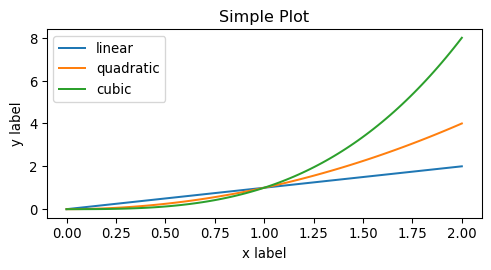

Source: [Documentation officielle de `matplotlib`](https://matplotlib.org/stable/users/explain/quick_start.html)

## Approche implicite

``` python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout="constrained")
plt.plot(x, x, label="linear")  # Plot some data on the (implicit) Axes.
plt.plot(x, x**2, label="quadratic")  # etc.
plt.plot(x, x**3, label="cubic")
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("Simple Plot")
plt.legend()
```

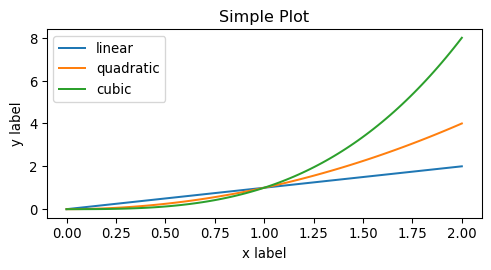

Source: [Documentation officielle de `matplotlib`](https://matplotlib.org/stable/users/explain/quick_start.html)

Ces √©l√©ments constituent le minimum pour comprendre la logique de `matplotlib`. Pour √™tre plus √† l‚Äôaise avec ces concepts, la pratique r√©p√©t√©e est indispensable.

## 2.2 D√©couvrir `matplotlib` par l‚Äôinterm√©diaire de `Pandas`

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 1 : Produire un premier graphique</h3>

Les donn√©es comportent plusieurs dimensions pouvant faire l‚Äôobjet d‚Äôune analyse statistique. Nous allons commencer par nous focaliser sur le volume de passage √† tel ou tel compteur.

Puisque nous avons comme objectif de synth√©tiser l‚Äôinformation pr√©sente dans notre jeu de donn√©es, nous devons d‚Äôabord mettre en oeuvre quelques agr√©gations *ad hoc* pour produire un
graphique lisible.

1.  Garder les dix bornes √† la moyenne la plus √©lev√©e. Comme pour obtenir un graphique ordonn√© du plus grand au plus petit avec les m√©thodes `plot` de `Pandas`, il faut avoir les donn√©es ordonn√©es du plus petit au plus grand (oui c‚Äôest bizarre mais c‚Äôest comme √ßa‚Ä¶), r√©ordonner les donn√©es.

2.  En premier lieu, sans se pr√©occuper des √©l√©ments de style ni de la beaut√©
    du graphique, cr√©er la structure du *barplot* (diagramme en batons) de la
    [page d‚Äôanalyse des donn√©es](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/dataviz/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name).

3.  Pour pr√©parer le travail sur la deuxi√®me figure, ne conserver
    que les 10 compteurs ayant comptabilis√©s le plus de v√©los.

4.  Comme pour la question 2, cr√©er un *barplot*
    pour reproduire la figure 2 de l‚Äô*open data* parisien

</div>

Les 10 principales stations √† l‚Äôissue de la question 1

[1] Heureusement, comme il existe un √©norme corpus de code en ligne utilisant `matplotlib`, les assistants de code comme `ChatGPT` ou `Github Copilot` sont pr√©cieux pour construire un graphique √† partir d‚Äôinstructions.

Figure 1 sans travail sur le style:

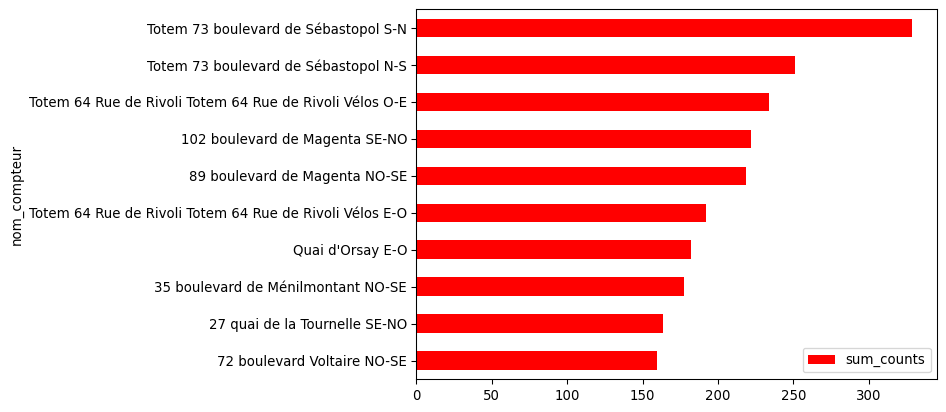

<details>
<summary>
Figure 2 sans travail sur le style:
</summary>

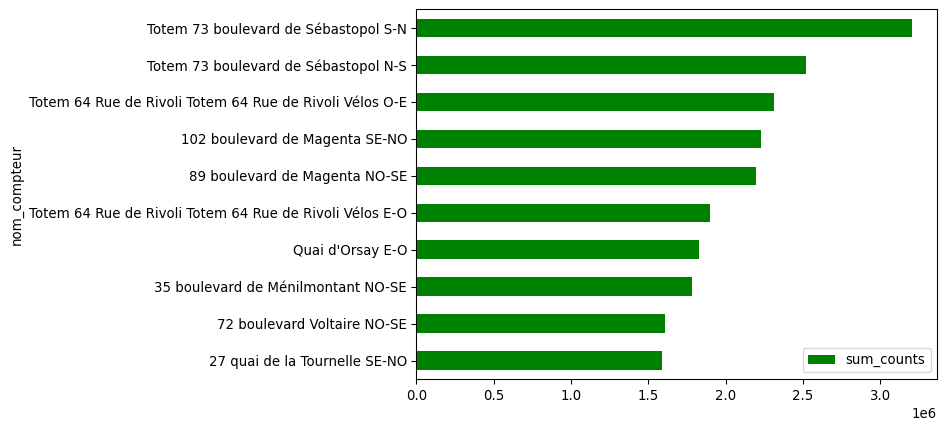

</details>

On commence √† avoir quelque chose qui commence √† transmettre
un message synth√©tique sur la nature des donn√©es.
On peut n√©anmoins remarquer plusieurs √©l√©ments probl√©matiques
(par exemple les labels) mais
aussi des √©l√©ments ne correspondant pas (les titres des axes, etc.) ou
manquants (le nom du graphique‚Ä¶).

Comme les graphiques produits par `Pandas` suivent la logique tr√®s flexible de `matplotlib`, il est possible de les customiser. Cependant, cela demande g√©n√©ralement beaucoup de travail et la grammaire `matplotlib` n‚Äôest pas aussi normalis√©e que celle de `ggplot` en `R`.
Si on d√©sire rester dans l‚Äô√©cosyst√®me `matplotlib`, il est pr√©f√©rable de directement utiliser `seaborn`, qui offre quelques arguments pr√™ts √† l‚Äôemploi. Sinon on peut basculer sur l‚Äô√©cosyst√®me `plotnine` qui offrira une syntaxe normalis√©e pour modifier les diff√©rents

# 3. Utiliser directement `seaborn`

## 3.1 Comprendre `seaborn` en quelques lignes

`seaborn` est une interface haut niveau au dessus de `matplotlib`. Ce package offre un ensemble de fonctionnalit√©s pour cr√©er des figures ou des axes `matplotlib` directement depuis une fonction admettant de nombreux arguments et, si besoin d‚Äôaller plus loin dans la customisation, d‚Äôutiliser les fonctionnalit√©s de `matplotlib` pour mettre √† jour la figure, que ce soit par le biais de l‚Äôapproche implicite ou explicite d√©crites pr√©c√©demment.

Comme pour `matplotlib`, `seaborn` permet de faire la m√™me figure de multiples mani√®res. `seaborn` h√©rite de la dualit√© axes-figures de `matplotlib` et il faudra souvent jouer avec un niveau ou l‚Äôautre. La principale caract√©ristique de `seaborn` est d‚Äôoffrir quelques points d‚Äôentr√©es standardis√©s, par exemple `seaborn.relplot` ou `seaborn.catplot`, et une logique d‚Äô*inputs* bas√©e sur le `DataFrame` l√† o√π `matplotlib` est structur√©e autour du *array* `Numpy`.

La figure comporte maintenant un message mais il est encore peu
lisible. Il y a plusieurs mani√®res de faire un *barplot* en `seaborn`. Les deux principales
sont :

-   `sns.catplot` ;
-   `sns.barplot`.

On propose d‚Äôutiliser `sns.catplot` pour cet exercice. Il s‚Äôagit d‚Äôun point d‚Äôentr√©e assez fr√©quent pour faire des graphiques d‚Äôune variable discr√©tis√©e.

## 3.2 Le diagramme en barre (*barplot*)

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2: reproduire la premi√®re figure avec seaborn</h3>

1.  R√©initialiser l‚Äôindex des *dataframes* `df1` et `df2`
    pour avoir une colonne *‚ÄòNom du compteur‚Äô*. R√©ordonner les donn√©es
    de mani√®re d√©croissante pour obtenir un graphique ordonn√© dans
    le bon sens avec `seaborn`.

2.  Refaire le graphique pr√©c√©dent avec la fonction `catplot` de `seaborn`. Pour
    contr√¥ler la taille du graphique vous pouvez utiliser les arguments `height` et
    `aspect`.

3.  Ajouter les titres des axes et le titre du graphique pour le premier graphique

4.  Essayez de colorer en rouge l‚Äôaxe des `x`. Vous pouvez pr√©-d√©finir un
    style avec `sns.set_style("ticks", {"xtick.color": "red"})`

</div>

A l‚Äôissue de la question 2, c‚Äôest-√†-dire en utilisant
`seaborn` pour reproduire de mani√®re minimale
un *barplot*, on obtient :

Apr√®s quelques r√©glages esth√©tiques, √† l‚Äôissue des questions 3 et 4,
on obtient une figure proche de celle du portail *open data* parisien.

Les param√®tres suppl√©mentaires propos√©s √† la question 4 permettent finalement d‚Äôobtenir la figure

On comprend ainsi que le boulevard de S√©bastopol est le plus emprunt√©,
ce qui ne vous suprendra pas si vous faites du v√©lo √† Paris.
N√©anmoins, si vous n‚Äô√™tes pas familiers avec la g√©ographie parisienne,
cela sera peu informatif pour vous, vous allez avoir besoin d‚Äôune
repr√©sentation graphique suppl√©mentaire: une carte ! Nous verrons
ceci lors d‚Äôun prochain chapitre.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2bis : reproduire la figure ‚ÄúLes 10 compteurs ayant comptabilis√© le plus de v√©los‚Äù</h3>

En suivant l‚Äôapproche graduelle de l‚Äôexercice 2,
refaire le graphique *Les 10 compteurs ayant comptabilis√© le plus de v√©los*
avec `seaborn`

</div>

## 3.3 Un exemple d‚Äôalternative au *barplot*, le *lollipop chart*

Les diagrammes en batons (*barplot*) sont extr√™mement communs, sans doute √† cause de l‚Äôh√©ritage d‚ÄôExcel o√π ces graphiques sont faisables en deux clics. N√©anmoins, en ce qui concerne le message √† transmettre, ils sont loin d‚Äô√™tre parfaits. Par exemple, les barres prennent beaucoup d‚Äôespace visuel
ce qui peut brouiller le message √† transmettre sur le rapport entre les observations.

Sur le plan s√©miologique, c‚Äôest √† dire sur le plan de l‚Äôefficacit√© du message √† transmettre,
les *lollipop charts* sont pr√©f√©rables : ils
transmettent la m√™me information mais avec moins de signes visuels pouvant brouiller sa compr√©hension.

Les *lollipop chart* ne sont pas parfaits non plus mais sont un peu plus efficaces pour transmettre le message. Pour en savoir plus sur les alternatives au *barplot*, la conf√©rence d‚ÄôEric Mauvi√®re pour le r√©seau des *data scientists* de la statistique publique, dont le message principal est *‚ÄúD√©sempilez vos figures‚Äù* m√©rite le d√©tour ([disponible sur le site ssphub.netlify.app/](https://ssphub.netlify.app/talk/2024-02-29-mauviere/))

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 3 (optionnel) : reproduire la figure 2 avec un lollipop chart</h3>

En suivant l‚Äôapproche graduelle de l‚Äôexercice 2,
refaire le graphique *Les 10 compteurs ayant comptabilis√© le plus de v√©los*.

üí° Ne pas h√©siter √† consulter [python-graph-gallery.com/](https://python-graph-gallery.com/) ou √† demander de l‚Äôaide √† `ChatGPT`

</div>

Text(0, 0.5, 'La somme des v√©los comptabilis√©s sur la p√©riode s√©lectionn√©e')

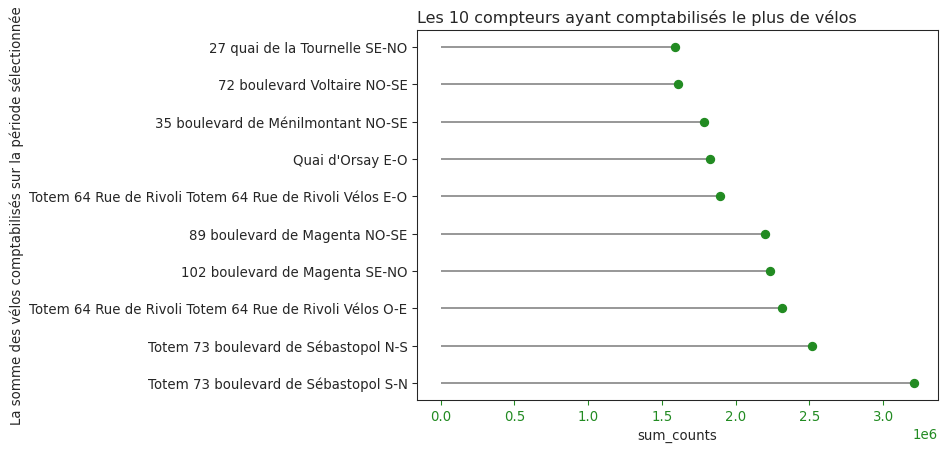

# 4. La m√™me figure avec `plotnine`

`plotnine` est le nouveau venu dans l‚Äô√©cosyst√®me de la visualisation en `Python`. Cette librairie est d√©velopp√©e par `Posit`, l‚Äôentreprise √† l‚Äôorigine de l‚Äô√©diteur `RStudio` et de l‚Äô√©cosyst√®me du *tidyverse* si central dans le langage `R`. Cette librairie vise √† importer la logique de `ggplot` en `Python` c‚Äôest √† dire une grammaire des graphiques normalis√©e, lisible et flexible h√©rit√®re de Wilkinson (2012).

<figure>
<img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/elmo.jpg" alt="L‚Äô√©tat d‚Äôesprit des habitu√©s de ggplot2 quand ils d√©couvrent plotnine" />
<figcaption aria-hidden="true">L‚Äô√©tat d‚Äôesprit des habitu√©s de <code>ggplot2</code>
quand ils d√©couvrent <code>plotnine</code></figcaption>
</figure>

Dans cette approche, un graphique est vu comme une succession de couches qui, une fois superpos√©es, donneront la figure suivante. En soi, ce principe n‚Äôest pas diff√©rent de celui de `matplotlib`. N√©anmoins, la grammaire utilis√©e par `plotnine` est beaucoup plus intuitive et normalis√©e ce qui offrira beaucoup plus d‚Äôautonomie pour modifier sa figure.

<figure>
<img src="https://psyteachr.github.io/data-skills-v2/images/corsi/layers.png" alt="La logique de ggplot (et plotnine) par Lisa (2021), image elle-m√™me emprunt√©e √† Field (2012)" />
<figcaption aria-hidden="true">La logique de <code>ggplot</code> (et <code>plotnine</code>) par <span class="citation" data-cites="Lisa_psyTeachR_Book_Template_2021">Lisa (2021)</span>, image elle-m√™me emprunt√©e √† <span class="citation" data-cites="field2012discovering">Field (2012)</span></figcaption>
</figure>

Avec `plotnine`, il n‚Äôy a plus de point d‚Äôentr√©e dual figure-axe. Comme l‚Äôillustrent les slides ci-dessous, :

1.  On initialise une figure
2.  On met √† jour les couches (*layers*), un niveau d‚Äôabstraction tr√®s g√©n√©ral concernant aussi bien les donn√©es repr√©sent√©es que les √©chelles des axes ou la couleur
3.  A la fin, on peut jouer sur l‚Äôesth√©tique en modifiant les labels des axes, de la l√©gende, les titres, etc.

<div class="sourceCode" id="cb1"><pre class="sourceCode yaml code-with-copy"><code class="sourceCode yaml"></code><button title="Copy to Clipboard" class="code-copy-button"><i class="bi"></i></button></pre><iframe class="sourceCode yaml code-with-copy" src="https://rgeo.linogaliana.fr/slides/ggplot.html#/ggplot2"></iframe></div>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 4: reproduire la premi√®re figure avec plotnine</h3>

Ceci est le m√™me exercice que l‚Äôexercice 2. L‚Äôobjectif est de faire cette figure avec `plotnine`

</div>

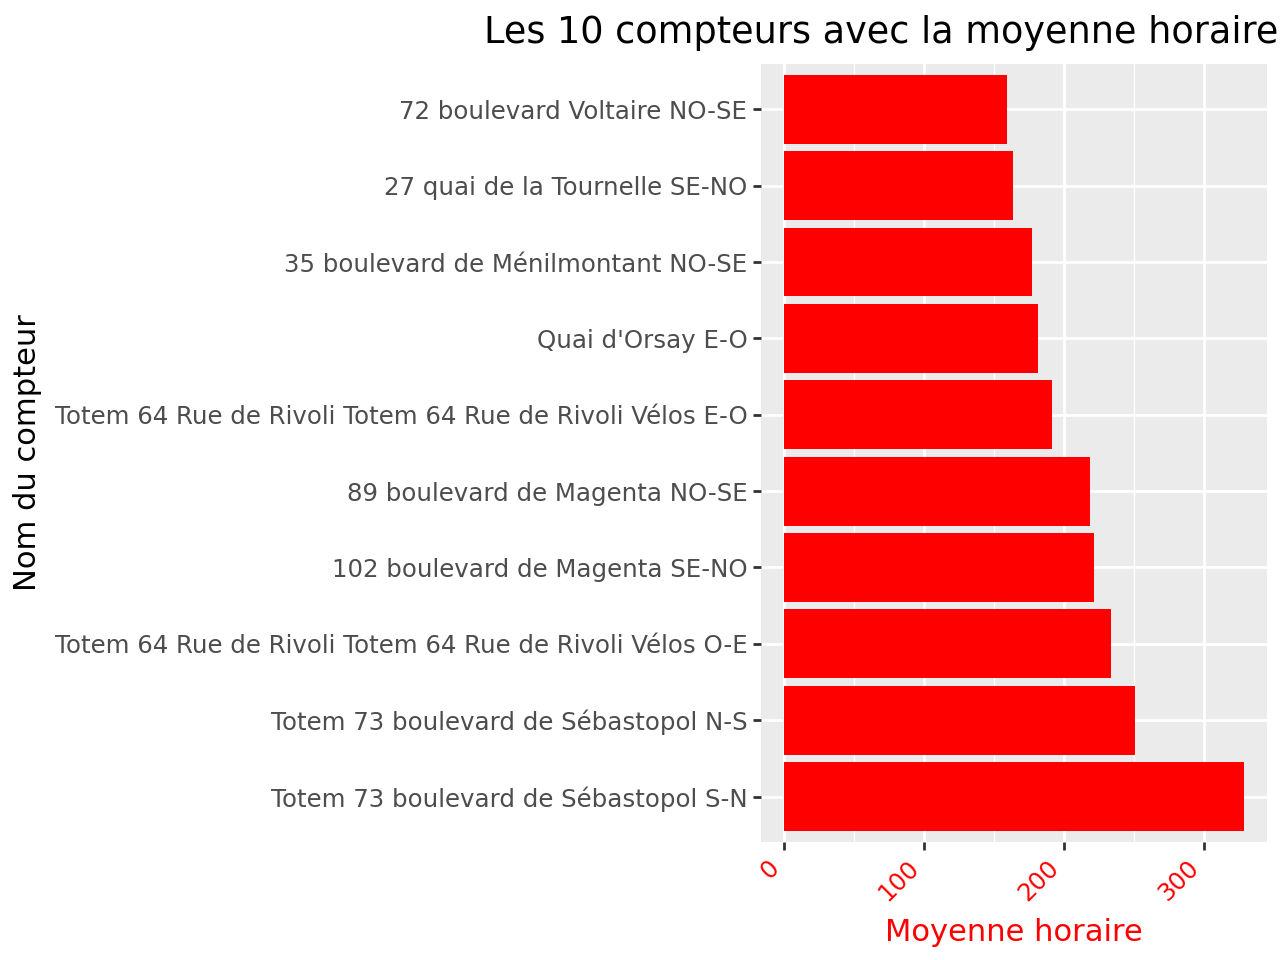

# 5. Premi√®res agr√©gations temporelles

On va maintenant se concentrer sur la dimension temporelle de notre
jeu de donn√©es √† travers deux approches :

-   Un diagramme en barre synth√©tisant l‚Äôinformation de notre jeu de donn√©es
    de mani√®re mensuelle ;
-   Des s√©ries instructives sur la dynamique temporelle. Cela sera l‚Äôobjet de la prochaine partie.

Avant cela, nous allons enrichir ces donn√©es pour b√©n√©ficier d‚Äôun historique plus long, permettant notamment d‚Äôavoir la p√©riode Covid dans nos donn√©es, ce qui pr√©sente un int√©r√™t du fait de la dynamique particuli√®re du trafic dans cette p√©riode (arr√™t brutal, reprise tr√®s forte‚Ä¶).

In [20]:
import requests
import zipfile
import io
import os
import pandas as pd
import geopandas as gpd

list_useful_columns = [
    "Identifiant du compteur",
    "Nom du compteur",
    "Identifiant du site de comptage",
    "Nom du site de comptage",
    "Comptage horaire",
    "Date et heure de comptage",
]


# GENERIC FUNCTION TO RETRIEVE DATA -------------------------


def download_unzip_and_read(url, extract_to="."):
    """
    Downloads a zip file from the specified URL, extracts its contents, and reads the CSV file based on the filename pattern in the URL.

    Parameters:
    - url (str): The URL of the zip file to download.
    - extract_to (str): The directory where the contents of the zip file should be extracted.

    Returns:
    - df (DataFrame): The loaded pandas DataFrame from the extracted CSV file.
    """
    try:
        # Extract the file pattern from the URL (filename without the extension)
        file_pattern = url.split("/")[-1].replace("_zip/", "")

        # Send a GET request to the specified URL to download the file
        response = requests.get(url)
        response.raise_for_status()  # Ensure we get a successful response

        # Create a ZipFile object from the downloaded bytes
        with zipfile.ZipFile(io.BytesIO(response.content)) as z:
            # Extract all the contents to the specified directory
            z.extractall(path=extract_to)
            print(f"Extracted all files to {os.path.abspath(extract_to)}")

            # Look for the file matching the pattern
            extracted_files = os.listdir(extract_to)
            csv_filename = [
                f for f in extracted_files if file_pattern in f and f.endswith(".csv")
            ]

            if not csv_filename:
                print(f"No file matching pattern '{file_pattern}' found.")
                return None

            # Read the first matching CSV file into a pandas DataFrame
            csv_path = os.path.join(extract_to, csv_filename[0])
            print(f"Reading file: {csv_path}")
            df = pd.read_csv(csv_path, sep=";")

            # CONVERT TO GEOPANDAS
            df[["latitude", "longitude"]] = df["Coordonn√©es g√©ographiques"].str.split(
                ",", expand=True
            )
            df["latitude"] = pd.to_numeric(df["latitude"])
            df["longitude"] = pd.to_numeric(df["longitude"])
            gdf = gpd.GeoDataFrame(
                df, geometry=gpd.points_from_xy(df.longitude, df.latitude)
            )
            # CONVERT TO TIMESTAMP
            df["Date et heure de comptage"] = pd.to_datetime(
                df["Date et heure de comptage"],
                format="%Y-%m-%dT%H:%M:%S",
                errors="coerce",
            )
            gdf = df.loc[:, list_useful_columns]
            return gdf

    except requests.exceptions.RequestException as e:
        print(f"Error: The downloaded file has not been found: {e}")
        return None
    except zipfile.BadZipFile as e:
        print(f"Error: The downloaded file is not a valid zip file: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def read_historical_bike_data(year):
    dataset = "comptage_velo_donnees_compteurs"
    url_comptage = f"https://opendata.paris.fr/api/datasets/1.0/comptage-velo-historique-donnees-compteurs/attachments/{year}_{dataset}_csv_zip/"
    df_comptage = download_unzip_and_read(
        url_comptage, extract_to=f"./extracted_files_{year}"
    )
    if df_comptage is None:
        url_comptage_alternative = url_comptage.replace("_csv_zip", "_zip")
        df_comptage = download_unzip_and_read(
            url_comptage_alternative, extract_to=f"./extracted_files_{year}"
        )
    return df_comptage


# IMPORT HISTORICAL DATA -----------------------------

historical_bike_data = pd.concat(
    [read_historical_bike_data(year) for year in range(2018, 2024)]
)

rename_columns_dict = {
    "Identifiant du compteur": "id_compteur",
    "Nom du compteur": "nom_compteur",
    "Identifiant du site de comptage": "id",
    "Nom du site de comptage": "nom_site",
    "Comptage horaire": "sum_counts",
    "Date et heure de comptage": "date",
}


historical_bike_data = historical_bike_data.rename(columns=rename_columns_dict)


# IMPORT LATEST MONTHS ----------------

import os
import requests
from tqdm import tqdm
import pandas as pd
import duckdb

url = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/comptage-velo-donnees-compteurs/exports/parquet?lang=fr&timezone=Europe%2FParis"
filename = "comptage_velo_donnees_compteurs.parquet"


# DOWNLOAD FILE --------------------------------

# Perform the HTTP request and stream the download
response = requests.get(url, stream=True)

if not os.path.exists(filename):
    # Perform the HTTP request and stream the download
    response = requests.get(url, stream=True)

    # Check if the request was successful
    if response.status_code == 200:
        # Get the total size of the file from the headers
        total_size = int(response.headers.get("content-length", 0))

        # Open the file in write-binary mode and use tqdm to show progress
        with open(filename, "wb") as file, tqdm(
            desc=filename,
            total=total_size,
            unit="B",
            unit_scale=True,
            unit_divisor=1024,
        ) as bar:
            # Write the file in chunks
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:  # filter out keep-alive chunks
                    file.write(chunk)
                    bar.update(len(chunk))
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")
else:
    print(f"The file '{filename}' already exists.")


# READ FILE AND CONVERT TO PANDAS
query = """
SELECT id_compteur, nom_compteur, id, sum_counts, date 
FROM read_parquet('comptage_velo_donnees_compteurs.parquet')
"""

# READ WITH DUCKDB AND CONVERT TO PANDAS
df = duckdb.sql(query).df()

df.head(3)


# PUT THEM TOGETHER ----------------------------

historical_bike_data = historical_bike_data.loc[
    historical_bike_data["date"] < df["date"].min()
]

df = pd.concat([historical_bike_data, df])


Pour commencer, reproduisons la troisi√®me figure qui est, encore une fois,
un *barplot*. Ici, sur le plan s√©miologique, ce n‚Äôest pas justifier d‚Äôutiliser un *barplot*, une simple s√©rie suffirait √† fournir une information similaire.

La premi√®re question du prochain exerice implique une premi√®re rencontre avec
une donn√©e temporelle √† travers une op√©ration assez classique en s√©ries
temporelles : changer le format d‚Äôune date pour pouvoir faire une agr√©gation
√† un pas de temps plus large.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 5: barplot des comptages mensuels</h3>

1.  Cr√©er une variable `month`
    dont le format respecte, par exemple, le sch√©ma `2019-08` gr√¢ce √† la bonne option de la m√©thode `dt.to_period`
2.  Appliquer les conseils pr√©c√©dents pour construire et am√©liorer
    graduellement un graphique afin d‚Äôobtenir une figure similaire
    √† la 3e production sur la page de l‚Äô*open data* parisien. Faire cette figure d‚Äôabord depuis d√©but 2022 puis sur toute la p√©riode de notre historique
3.  Question optionnelle: repr√©senter la m√™me information sous forme de *lollipop*

</div>

La figure avec les donn√©es depuis d√©but 2022 aura cet aspect si elle a √©t√© construite avec `plotnine`:

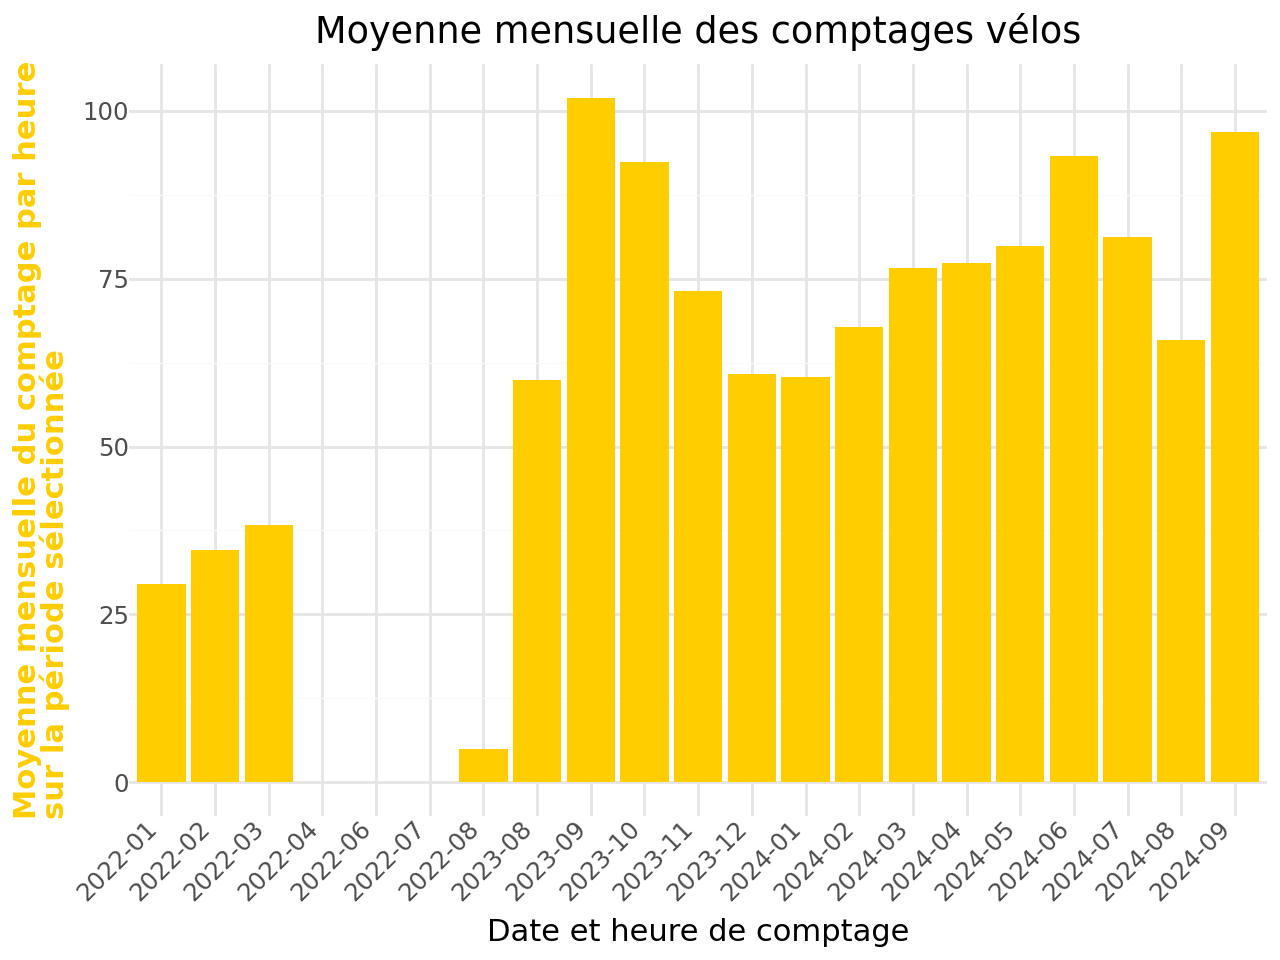

Avec `seaborn`, elle ressemblera plut√¥t √† ceci:

Text(0.5, 1.0, 'Moyenne mensuelle des comptages v√©los')

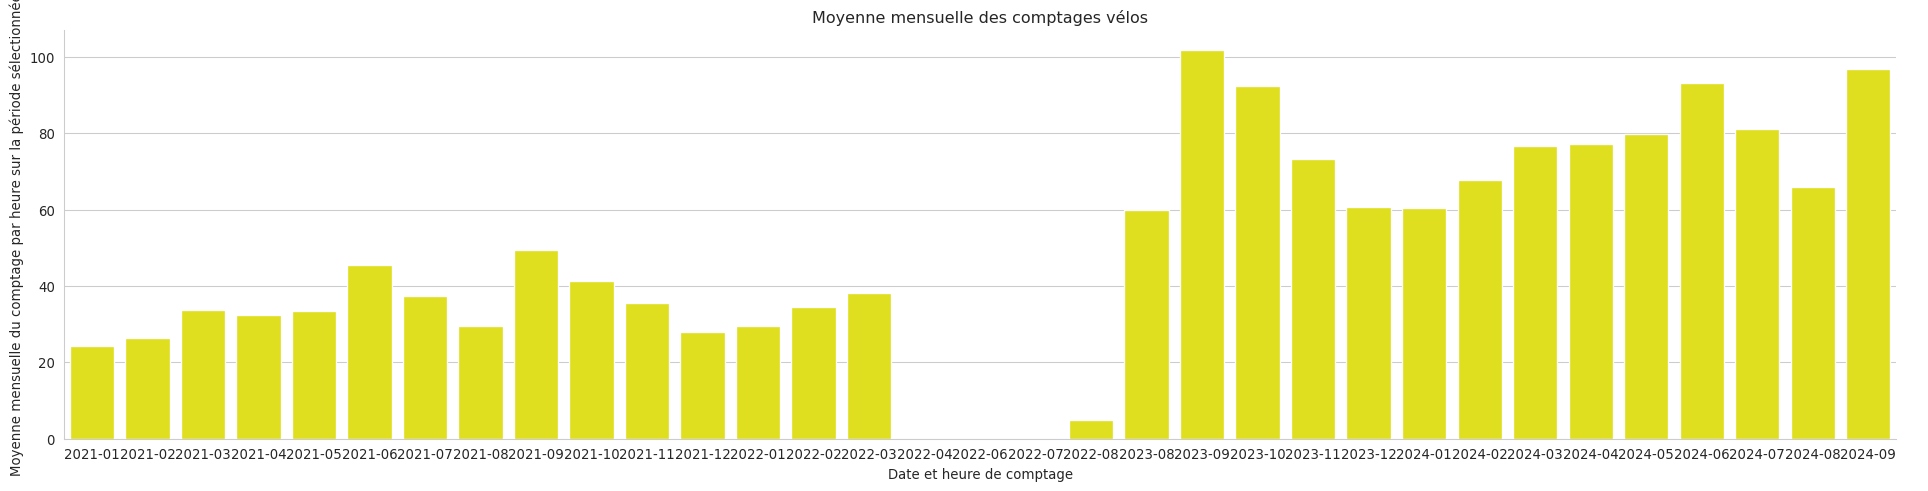

Si vous pr√©f√©rez repr√©senter cela sous forme de *lollipop*[1]:

[1] J‚Äôai retir√© la couleur sur l‚Äôaxe des ordonn√©es qui, je trouve,
apporte peu √† la figure voire d√©grade la compr√©hension du message.

/opt/mamba/lib/python3.11/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().

Enfin, sur l‚Äôensemble de la p√©riode, la s√©rie prendra plut√¥t cette forme:

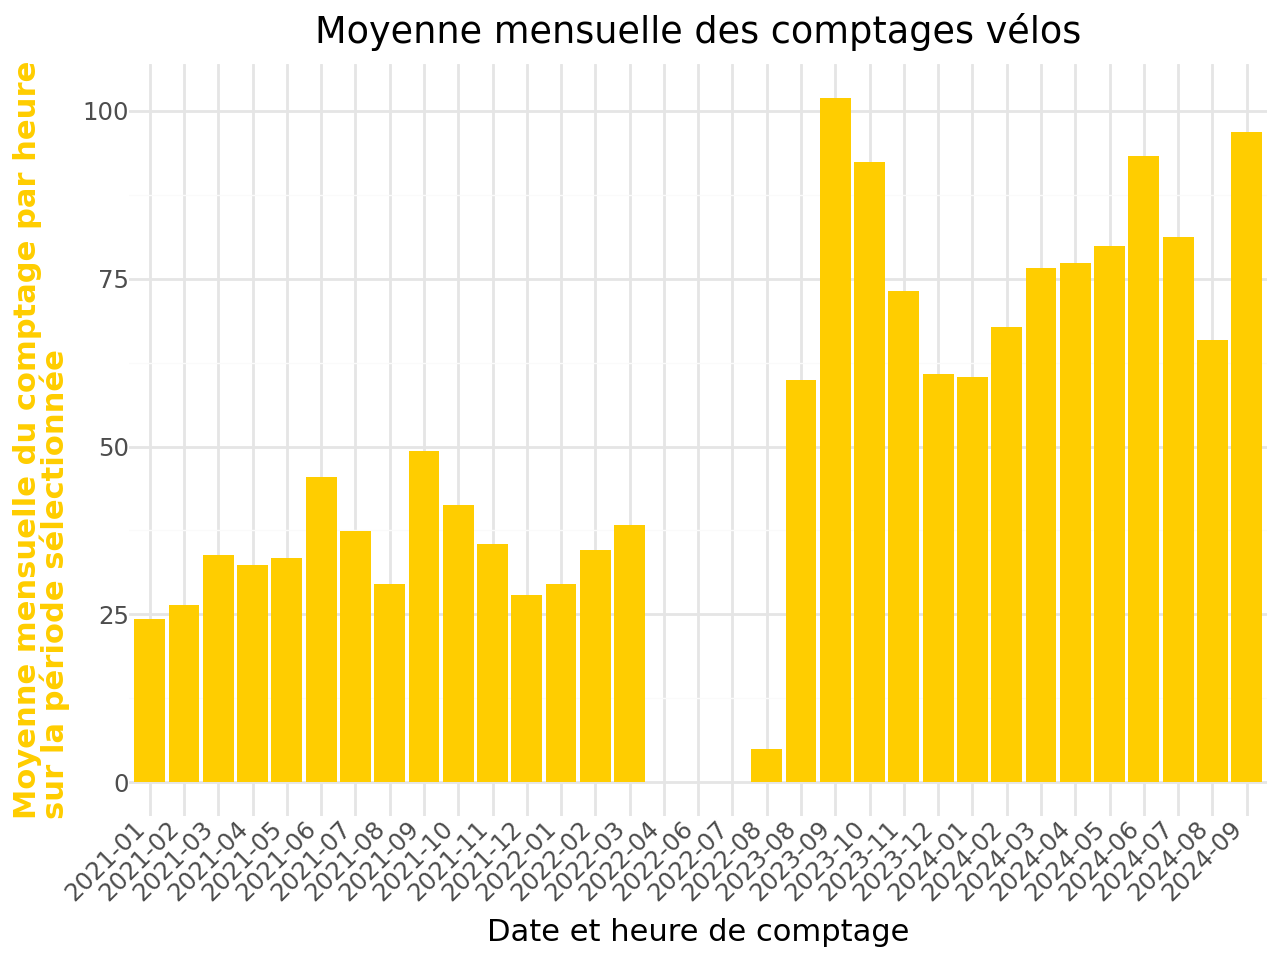

# 6. Premi√®re s√©rie temporelle

Il est plus commun de repr√©senter sous forme de s√©rie
les donn√©es ayant une dimension temporelle.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 5: barplot des comptages mensuels</h3>

1.  Cr√©er une variable `day` qui transforme l‚Äôhorodatage en format journalier
    du type `2021-05-01` avec `dt.day`.
2.  Reproduire la figure de la page d‚Äô*open data*

</div>

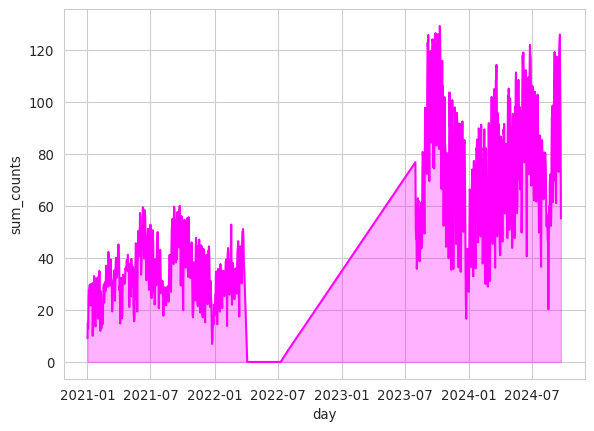

# 7. Des graphiques dynamiques avec `Plotly`

## 7.1 Contexte

L‚Äôinconv√©nient des figures avec `ggplot` est que celles-ci ne permettent
pas d‚Äôinteraction avec le lecteur. Toute l‚Äôinformation doit donc √™tre
contenue dans la figure ce qui peut la rendre difficile √† lire.
Si la figure est bien faite, avec diff√©rents niveaux d‚Äôinformation, cela
peut bien fonctionner.

Il est n√©anmoins plus simple, gr√¢ce aux technologies *web*, de proposer des
visualisations √† plusieurs niveaux. Un premier niveau d‚Äôinformation, celui du
coup d‚Äôoeil, peut suffire √† assimiler les principaux messages de la
visualisation. Ensuite, un comportement plus volontaire de recherche
d‚Äôinformation secondaire peut permettre d‚Äôen savoir plus. Les visualisations
r√©actives, qui sont maintenant la norme dans le monde de la *dataviz*,
permettent ce type d‚Äôapproche : le lecteur d‚Äôune visualisation peut passer
sa souris √† la recherche d‚Äôinformation compl√©mentaire (par exemple les
valeurs exactes) ou cliquer pour faire appara√Ætre des informations compl√©mentaires
sur la visualisation ou autour.

Ces visualisations reposent sur le m√™me triptyque que l‚Äôensemble de l‚Äô√©cosyst√®me
*web* : `HTML`, `CSS` et `JavaScript`. Les utilisateurs de `Python`
ne vont jamais manipuler directement ces langages, qui demandent une
certaine expertise, mais vont utiliser des librairies au niveau de `R` qui g√©n√®reront automatiquement tout le code `HTML`, `CSS` et `JavaScript`
permettant de cr√©er la figure.

## 7.2 La librairie `Plotly`

Le package `Plotly` est une surcouche √† la librairie `Javascript`
`Plotly.js` qui permet de cr√©er et manipuler des objets graphiques de mani√®re
tr√®s flexible afin de produire des objets r√©actifs sans avoir √† recourir
√† Javascript.

Le point d‚Äôentr√©e recommand√© est le module `plotly.express`
([documentation ici](https://plotly.com/python/plotly-express/)) qui offre une arborescence
riche mais n√©anmoins intuitive pour construire des graphiques
(objets `plotly.graph_objects.Figure`) pouvant √™tre modifi√©s *a posteriori*
si besoin (par exemple pour *customiser* les axes).

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Visualiser les figures produites par <code>Plotly</code></h3>

Dans un notebook Jupyter classique, les lignes suivantes de code permettent
d‚Äôafficher le r√©sultat d‚Äôune commande `Plotly` sous un bloc de code :

``` python
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
```

Pour `JupyterLab`, l‚Äôextension `jupyterlab-plotly` s‚Äôav√®re n√©cessaire:

``` python
!jupyter labextension install jupyterlab-plotly
```

</div>

## 7.3 R√©plication de l‚Äôexemple pr√©c√©dent avec `Plotly`

Les repr√©sentations fig√©es comme celles ci-dessus
sont approri√©es pour des rapports ou articles.
N√©anmoins

Les modules suivants seront n√©cessaires pour construire des graphiques
avec `plotly`:

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 7: un barplot avec <code>Plotly</code></h3>

L‚Äôobjectif est de reconstuire le premier diagramme en barre rouge avec `Plotly`.

1.  R√©alisez le graphique en utilisant la fonction ad√©quate avec `plotly.express` et‚Ä¶
    -   Ne pas prendre le
        th√®me par d√©faut mais un √† fond blanc, pour avoir un r√©sultat ressemblant
        √† celui propos√© sur le site de l‚Äô*open-data*.
    -   Pour la couleur rouge,
        vous pouvez utiliser l‚Äôargument `color_discrete_sequence`.
    -   Ne pas oublier de nommer les axes
    -   Pensez √† la couleur du texte de l‚Äôaxe inf√©rieur
2.  Tester un autre th√®me, √† fond sombre. Pour les couleurs, faire un
    groupe stockant les trois plus fortes valeurs puis les autres.

</div>

Cette repr√©sentation montre bien le caract√®re sp√©cial de l‚Äôann√©e 2020. Pour
rappeller au lecteur distrait la nature particuli√®re de la p√©riode, marqu√©e
par un premier confinement qu‚Äôon voit bien dans les donn√©es, on pourrait,
avec l‚Äôaide de la [documentation](https://plotly.com/python/horizontal-vertical-shapes/),
ajouter deux barres verticales pour marquer les dates de d√©but et
de fin de cette p√©riode.

Field, A. 2012. ¬´¬†Discovering Statistics Using R¬†¬ª. Sage.

Lisa, DeBruine. 2021. ¬´¬†psyTeachR Book Template¬†¬ª. <https://github.com/psyteachr/template/>.

Wilkinson, Leland. 2012. *The grammar of graphics*. Springer.